this is mostly just exploring the data and learning timeseries with pandas, but I've provided it for your review and to see if there are any ideas you have that would be good to explore. And I'll be continuing to explore the data in the comming weeks. 

In [ ]:
from dask.distributed import Client
client = Client()


In [ ]:
import dask.dataframe as dd
df = dd.read_csv('AllTraffic_1.csv', sep='\t')

#df.head(10)

In [ ]:
from tslearn.clustering import KShape

In [1]:
import pandas as pd
import numpy as np

import seaborn
from  matplotlib import pyplot
# Use seaborn style defaults and set the default figure size
seaborn.set(rc={'figure.figsize':(11, 4)})

df = pd.read_csv('AllTraffic_1.csv', sep='\t')

### Data cleaning
df.index = pd.to_datetime(df.timestamp)

# df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,20,21,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
sample_df = df[:10000]#df.sample(100000)
sample_df = sample_df.groupby('source_ip').resample('D')['id'].nunique()

# remove ips that send less than 'packet_minimum'
# packet_minimum = 5
# day_gr1 = sample_df.sum(level=0, axis=0)
# day_gr1 = day_gr1[day_gr1 > packet_minimum]

# sample_df = sample_df.loc[gr1.index].unstack(level=0)
sample_df#.plot(marker='.', legend=None, linestyle='None')

In [ ]:
sample_df = df[:1000000]#.sample(100000)
sample_df = sample_df.groupby('source_ip').resample('D')['id'].nunique()

# remove ips that show up more than 'day_minimum'
# day_minimum = 10

count_gr1 = sample_df.count(level=0)
count_gr1 = count_gr1[count_gr1 > day_minimum]
sample_df = sample_df.loc[count_gr1.index].unstack(level=0)
sample_df = sample_df.replace(0, np.nan)
# sample_df.plot(marker='.', legend=None, linestyle='None')

In [35]:
from datetime import timedelta

sample_df = df.sample(1000000)

sample_df['timestamp'] = pd.to_datetime(sample_df['timestamp'])
first_day = sample_df['timestamp'].min().normalize()
last_day = sample_df['timestamp'].max().normalize()
delta = (last_day - first_day).days
days_array = [first_day + timedelta(days=day) for day in range(delta + 1)]
empty_dict = dict.fromkeys(days_array, 0)

# TODO: add a 0 value for any day not present in timestamp_dict
# sort by source ip and get unique timestamps the round them to nearest day
timestamp_df = sample_df.groupby('source_ip')['timestamp'].unique().apply(lambda time_array: list(pd.to_datetime(time).normalize() for time in time_array))
# remove source ips with less than 100 attacks and remove '000.000.000.000' TODO: check before removal
timestamp_dict = timestamp_df.drop('000.000.000.000').loc[lambda stamps_df: list(len(row) > 100 for row in stamps_df)].to_dict()

In [36]:
import math

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)


# TODO: check sklearn implementaion of cosine similarity using arrays
def make_timestamp_count_dict(timestamp_counts):
    rtn_dict = empty_dict.copy()
    for timestamp, count in timestamp_counts.items():
        rtn_dict[timestamp] = count
    return rtn_dict.values()

In [43]:
from collections import Counter
timestamp_dict.update((ip, Counter(timestamps)) for ip, timestamps in timestamp_dict.items())

for ip, timestamp_counts in timestamp_dict.items():
    for ip2, timestamp_counts2 in timestamp_dict.items():
        if ip == ip2: continue
        similarity1 = counter_cosine_similarity(dict(timestamp_counts), dict(timestamp_counts2))
        if similarity1 == 0: continue
        if similarity1 > 0.9:
            print(f'Ip 1: {ip}\nIp 2: {ip2}\n\t{similarity1}')

Ip 1: 103.240.182.163
Ip 2: 36.155.2.246
	0.9451450501396024
Ip 1: 103.90.157.36
Ip 2: 202.79.16.178
	1.0
Ip 1: 103.90.157.36
Ip 2: 52.64.4.24
	0.9132803319968604
Ip 1: 114.143.133.170
Ip 2: 162.212.202.221
	0.9173097227429918
Ip 1: 114.143.133.170
Ip 2: 18.185.116.98
	0.9717433288515601
Ip 1: 118.212.143.43
Ip 2: 123.183.209.131
	0.9905662264269212
Ip 1: 121.11.76.101
Ip 2: 59.148.241.181
	0.99969142080864
Ip 1: 121.67.212.9
Ip 2: 84.234.7.170
	0.9997620684151801
Ip 1: 122.194.229.18
Ip 2: 122.194.229.19
	0.9367498209678704
Ip 1: 122.194.229.19
Ip 2: 122.194.229.18
	0.9367498209678704
Ip 1: 123.183.209.131
Ip 2: 118.212.143.43
	0.9905662264269212
Ip 1: 123.244.9.73
Ip 2: 123.244.9.78
	0.9149118454005672
Ip 1: 123.244.9.76
Ip 2: 123.244.9.77
	0.9174792703776176
Ip 1: 123.244.9.77
Ip 2: 123.244.9.76
	0.9174792703776176
Ip 1: 123.244.9.78
Ip 2: 123.244.9.73
	0.9149118454005672
Ip 1: 136.243.44.95
Ip 2: 159.69.70.41
	0.9992295304282929
Ip 1: 136.243.44.95
Ip 2: 88.198.7.181
	0.99972749574

Ip 1: 221.214.179.6
Ip 2: 203.146.107.42
	0.9067472700065303
Ip 1: 222.180.208.178
Ip 2: 192.187.120.154
	0.9588967651541397
Ip 1: 31.178.171.211
Ip 2: 78.186.203.147
	1.0
Ip 1: 31.184.192.190
Ip 2: 185.153.198.170
	0.9734171683335758
Ip 1: 31.184.192.190
Ip 2: 185.153.198.97
	0.9492407907253236
Ip 1: 31.184.192.190
Ip 2: 198.46.140.106
	0.9003217260433001
Ip 1: 31.184.192.190
Ip 2: 218.92.0.166
	0.9510025044897514
Ip 1: 34.245.32.96
Ip 2: 54.174.12.205
	0.938881714645381
Ip 1: 36.155.2.246
Ip 2: 103.240.182.163
	0.9451450501396024
Ip 1: 37.8.91.111
Ip 2: 82.205.15.75
	1.0
Ip 1: 40.121.205.238
Ip 2: 146.185.239.77
	0.9502139439650716
Ip 1: 41.216.186.87
Ip 2: 218.92.0.163
	0.9786144622330394
Ip 1: 41.219.17.115
Ip 2: 58.242.82.7
	0.9458871053798271
Ip 1: 42.123.125.19
Ip 2: 58.59.7.161
	1.0
Ip 1: 42.7.26.54
Ip 2: 195.154.183.19
	0.9033536175683238
Ip 1: 45.227.255.99
Ip 2: 158.69.242.200
	0.9077742865377052
Ip 1: 45.227.255.99
Ip 2: 51.15.162.39
	0.9375357380853316
Ip 1: 46.101.181.209

In [47]:
graph_df = sample_df.groupby('source_ip').resample('D')['id'].nunique().replace(0, np.nan).dropna()

(timestamp
 2019-04-02    149.0
 Name: id, dtype: float64,
 timestamp
 2019-04-02    803.0
 2019-04-03     93.0
 Name: id, dtype: float64)

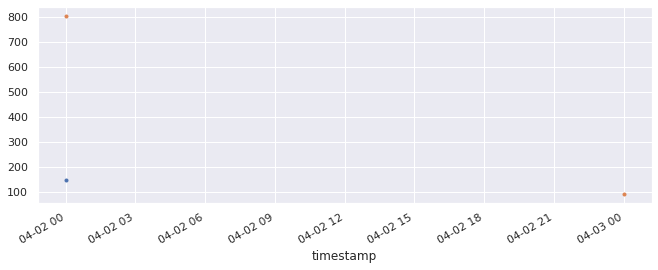

In [50]:
ip_1 = '94.140.123.98'
ip_2 = '93.189.44.132'

check_1, check_2 = [graph_df[ip_1], graph_df[ip_2]]

check_1.plot(marker='.', linestyle='None', legend=None)
check_2.plot(marker='.', linestyle='None', legend=None)
check_1, check_2

In [ ]:
ip_time_df = pd.DataFrame()
ip_time_df = df.resample('D')['source_ip'].value_counts()
ip_time_df = ip_time_df.unstack().fillna(0)

In [ ]:
                                    #ips              #days
ip_time_df = ip_time_df.transpose()[1:].transpose()#[:3]
ip_time_df.sum().sort_values(ascending=True)[-25:].plot(kind='bar')

In [ ]:
plot = ip_time_df.plot(marker='.', linestyle='None', legend=None)

In [ ]:
mrx = df.loc[df['source_ip'] == '195.154.183.123']

In [ ]:
mrxresample = mrx.resample('S')[['id', 'destination_port']].nunique()

mrxresample = mrxresample.where(mrxresample > 0)

mrxresample.plot(marker='.', linestyle='None', legend=None)

when samples equal to one are selected this may show initial port scan technique

In [ ]:
mrxresample = mrxresample.where(mrxresample <= 1)
mrxresample.plot(marker='.', linestyle='None', legend=None)

In [ ]:
mrx['destination_port'].unique()

In [ ]:
xresample = mrx[['destination_port', 'source_ip', 'id']].resample('S')

mrx_array = []
for groupname, group in xresample:
    mrx_array.append([groupname,
                      len(group),
                      group['destination_port'].values,
                      group['source_ip'].values])
    
mrx_df = pd.DataFrame(mrx_array, columns=['timegroup', 'count', 'ports', 'ips'])
mrx_df = mrx_df[mrx_df['count'] != 0]
mrx_df.plot(x='timegroup', y='count', marker='.', linestyle='None', legend=None)

In [ ]:
# mrx_30sec_groups = mrx.resample('30S').indices

# mrx_index = []
# for i in mrx_30sec_groups:
#     for x in mrx_30sec_groups[i]:
#         mrx_index.append((i, mrx.iloc[x].timestamp))
        
# timegroup_index = pd.MultiIndex.from_tuples(mrx_index, names=['timegroup', 'timestamp'])

# mrx.index = timegroup_index
# # mrx

In [ ]:
start_date = pd.Timestamp('2017-11-01 20:45')
end_date = pd.Timestamp('2017-11-01 22:00')

mask = (mrxresample.index > start_date) & (mrxresample.index <= end_date)
the2nd = mrxresample.loc[mask]

the2nd.plot(marker='.', linestyle='None', legend=None)

In [ ]:
mry = df.loc[df['source_ip'] == '221.194.47.221']
mryresample = mry.resample('S').count()['id']

mryresample = mryresample.where(mryresample > 0)

mryresample.plot(marker='.', linestyle='None', legend=None)

In [ ]:
mry2 = df.loc[df['source_ip'] == '221.194.47.236']
mry2resample = mry2.resample('S').count()['id']

mry2resample = mry2resample.where(mry2resample > 0)

mry2resample.plot(marker='.', linestyle='None', legend=None)

In [ ]:
mry_unique_ports = mry['source_port'].unique()
mry2_unique_ports = mry2['source_port'].unique()

print(len(mry_unique_ports))
similar_array = []

for port in mry_unique_ports:
    if port in mry2_unique_ports:
        similar_array.append(port)
        
len(similar_array)

In [ ]:
mry = df.loc[df['subnet'] == '221.194.47.0/24']#[:100]

mry_30sec_groups = mry.resample('30S').indices

mry_index = []
for i in mry_30sec_groups:
    for x in mry_30sec_groups[i]:
        mry_index.append((i, mry.iloc[x].timestamp))
        
timegroup_index = pd.MultiIndex.from_tuples(mry_index, names=['timegroup', 'timestamp'])

mry.index = timegroup_index
# mry['unique_ids'] = mry.groupby('timegroup')['id'].nunique()

# fg = seaborn.FacetGrid(data=mry, hue='destination_port', hue_order=_ports, aspect=1.61)
# fg.map(pyplot.scatter)

#mry.groupby('timegroup')['timestamp'].nunique().plot(marker='.', linestyle='None', legend=None)

# is there something cleaner than this??
# mryresample = mryresample.where(mryresample['count'] > 0).dropna()
# mryresample.plot(marker='.', linestyle='None', legend=None)

# Unique ips in attack time (30s)

In [ ]:
mry.groupby('timegroup')['source_ip'].nunique().plot(marker='.', linestyle='None', legend=None)

In [ ]:
start_date = pd.Timestamp('2017-06-30')
end_date = pd.Timestamp('2017-08-14')

mask = (mryresample.index > start_date) & (mryresample.index <= end_date)
the2nd = mryresample.loc[mask]

the2nd.plot(marker='.', linestyle='None', legend=None)

In [ ]:
largeones = mryresample.where(mryresample > 10)
largeones.dropna()